In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image
%matplotlib inline

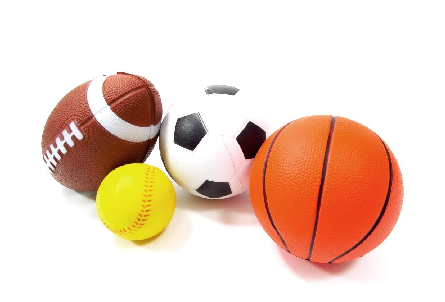

In [2]:
# オリジナル画像
img = cv2.imread("./image/ball.png")

plt.axis('off')
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
# HSV空間へ
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# HSV空間で色の範囲を指定する (黄色)
lower_color = np.array([20, 80, 10])
upper_color = np.array([40, 255, 255])

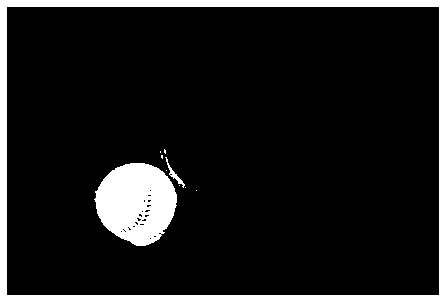

In [4]:
# 指定した色に基づいたマスク画像の生成
mask1 = cv2.inRange(hsv, lower_color, upper_color)

plt.axis('off')
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.imshow(cv2.cvtColor(mask1, cv2.COLOR_BGR2RGB))
plt.show()

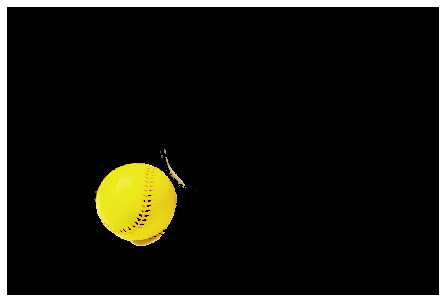

In [5]:
# マスク指定された部分(白)はそのまま、それ以外の部分は黒塗り
output1 = cv2.bitwise_and(img, img, mask = mask1)

plt.axis('off')
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.imshow(cv2.cvtColor(output1, cv2.COLOR_BGR2RGB))
plt.show()

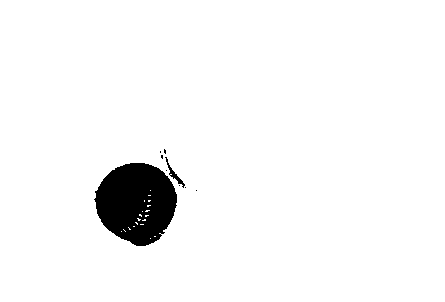

In [6]:
# 黄色のマスク画像を反転させて、黄色以外の領域となるマスク画像を生成
mask2 = cv2.bitwise_not(mask1)

plt.axis('off')
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.imshow(cv2.cvtColor(mask2, cv2.COLOR_BGR2RGB))
plt.show()

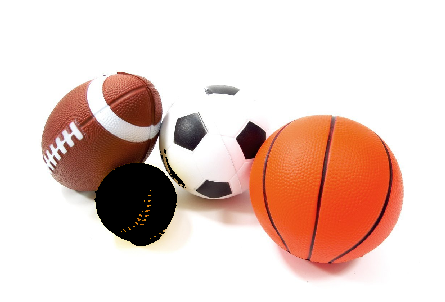

In [7]:
# マスク指定された部分(白)はそのまま、それ以外の部分は黒塗り
output2 = cv2.bitwise_and(img, img, mask = mask2)

plt.axis('off')
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.imshow(cv2.cvtColor(output2, cv2.COLOR_BGR2RGB))
plt.show()

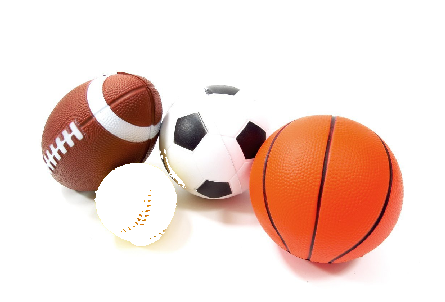

In [8]:
# 2つの画像を重みを付けて合成する
# alphaは1つ目の画像の重み
# betaは2つ目の画像の重み
# gammaは2つの画像に加算される重みで全体の明度のような扱い
output3 = cv2.addWeighted(src1=output2, alpha=1, src2=cv2.cvtColor(mask1, cv2.COLOR_BGR2RGB), beta=1, gamma=0)

plt.axis('off')
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.imshow(cv2.cvtColor(output3, cv2.COLOR_BGR2RGB))
plt.show()